//Importing the modules

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

//Reading chat file and creating dataframe using custom parsing function

In [ ]:
# Define a custom parsing function
def parse_whatsapp_line(line):
  #[17/06/23, 11:24:06 AM] J: Saatutu 11:45 ku varatta na
    parts = line.strip().split('] ')
   #[17/06/23, 11:24:06 AM] J: Saatutu 11:45 ku varatta
    #['[17/06/23, 11:24:06 AM', 'J: Saatutu 11:45 ku varatta']
    if len(parts) > 1:
      #yes na mattum condition ulla pogum
        datetime, sender_message = parts
        #datetime='[17/06/23, 11:24:06 AM'
        #sender_message='J: Saatutu 11:45 ku varatta'
        datetime_parts = datetime.split(', ')
        #datetime_parts=['[17/06/23', '11:24:06 AM']
        if len(datetime_parts) == 2:
            date_,time_ = datetime_parts
            #date_='[17/06/23'
            #time_='11:24:06 AM
            senderMessage=sender_message.split(':',1) #For first occurance of : alone to avoid : in message
            #senderMessage=['J','Saatutu 11:45 ku varatta']
            if(len(senderMessage)==2):
              sender,message=senderMessage
            else:
              sender= sender_message
              message=None
            return [date_[1:],time_,sender,message]
    return [None, None,None,None]

# Path to your WhatsApp chat text file
file_path = '/content/_chat.txt'

# Read the file line by line
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Parse each line using the custom parsing function
parsed_data = [parse_whatsapp_line(line) for line in lines]

# Filter out None values (lines that couldn't be parsed)
parsed_data = [data for data in parsed_data if data[0] is not None]

# Create DataFrame from parsed data
df = pd.DataFrame(parsed_data, columns=['Date','Time', 'Sender','Message'])

# Split sender_message into separate sender and message columns
#df[['Sender', 'Message']] = df['Sender_Message'].str.split(': ', 1, expand=True)

# Drop the Sender_Message column
#df.drop(columns=['Sender_Message'], inplace=True)

# Print first few rows of the DataFrame
df.tail()


,Date,Time,Sender,Message
63754,14/06/24,10:11:59 AM,Bullbull Koil,Solren aprm 😂
63755,14/06/24,10:17:58 AM,Ajay Na Koil,Na yarayo adichitu um ku ulla odren
63756,14/06/24,10:18:01 AM,Ajay Na Koil,Adana 🤣🤣🤣
63757,14/06/24,10:18:55 AM,Bullbull Koil,Ila ila adhelam ila
63758,14/06/24,10:19:04 AM,Bullbull Koil,Andha arumugam lane Amman koil iruku la


Converting into Excel file and downloading it

In [ ]:
file_name = 'my_dataframe.xlsx'
df.to_excel(file_name, index=False)

In [ ]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

//Start of Analysis

---



***i) Total number of messages sent by each member of the group.***

In [ ]:
#for knowing the total messages sent by each memebers
# Group by sender and count the number of messages sent by each sender
sender_message_count = df.groupby('Sender')['Message'].count().reset_index()

# Rename the count column
sender_message_count = sender_message_count.rename(columns={'Message': 'Message_Count'})

# Filter rows where Message_Count is not equal to 0
sender_message_count = sender_message_count[sender_message_count['Message_Count'] != 0]

# Sort the DataFrame by Message_Count in descending order
#sender_message_count = sender_message_count.sort_values(by='Message_Count', ascending=False)
#print(sender_message_count)
sender_message_count


,Sender,Message_Count
0,A2 Koil,2933
1,Aiyooo,15
2,Ajay Na Koil,10644
3,Arnold Koil,9825
4,Bullbull Koil,11476
5,J,8564
6,Krishna Tirupathi Koil,10360
7,Meta AI,3
8,Pranesh 🫳🏼🫳🏼 Koil,9932
9,‎You,7


downloading the sender_message_count dataframe as excel

In [ ]:
file_name="sender_message_count.xlsx"
sender_message_count.to_excel(file_name,index=False)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

visualising the sender_message_count

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129779 (\U0001faf3) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


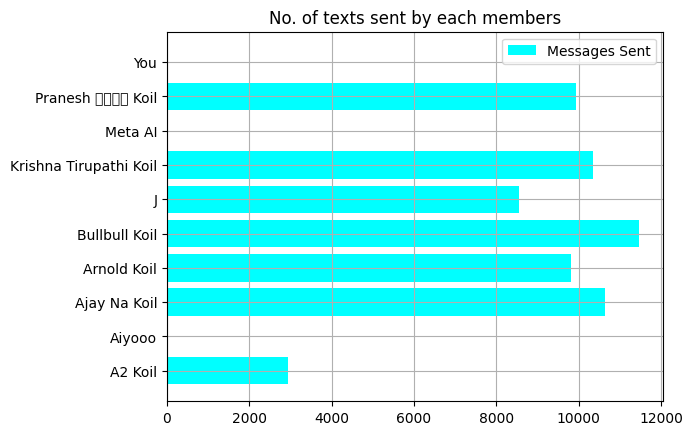

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129779 (\U0001faf3) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


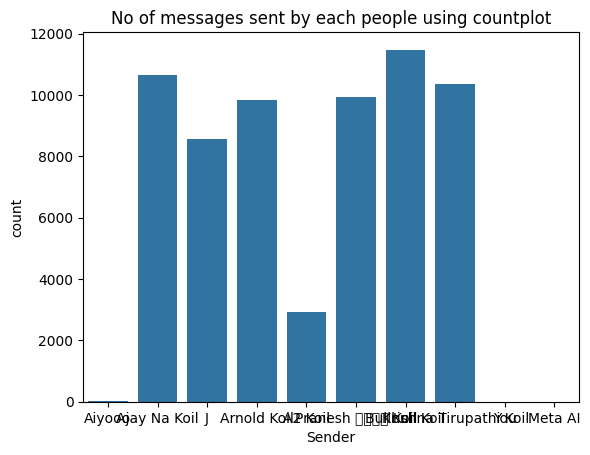

In [ ]:
plt.barh(sender_message_count["Sender"],sender_message_count["Message_Count"], color="cyan",label="Messages Sent")
plt.legend()
plt.grid()
plt.title("No. of texts sent by each members")
plt.show()
#this can be achieved using a simple count plot too!
sns.countplot(df, x="Sender")
plt.title("No of messages sent by each people using countplot")
plt.show()

***ii) Analysis on the length of each message***

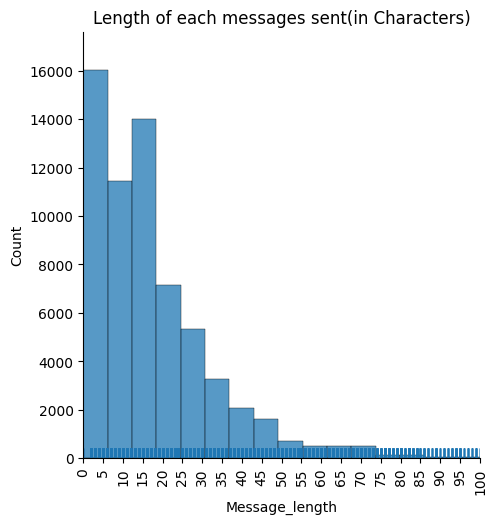


The mean length of each message in the group is:  17.925437977383584

The median length of each message in the group is:  15.0


,Date,Time,Sender,Message,Message_length
0,17/06/23,11:22:57 AM,Aiyooo,‎Messages and calls are end-to-end encrypted....,122
1,17/06/23,11:22:57 AM,Ajay Na Koil,‎Ajay Na Koil created group “Aiyooo”,37
2,17/06/23,11:22:57 AM,Aiyooo,‎Ajay Na Koil added you,24
3,17/06/23,11:23:43 AM,Ajay Na Koil,Going to parrys for buying leaf design tuni f...,62
4,17/06/23,11:24:05 AM,J,Saatutu 11:45 ku varatta na,28
...,...,...,...,...,...
63754,14/06/24,10:11:59 AM,Bullbull Koil,Solren aprm 😂,14
63755,14/06/24,10:17:58 AM,Ajay Na Koil,Na yarayo adichitu um ku ulla odren,36
63756,14/06/24,10:18:01 AM,Ajay Na Koil,Adana 🤣🤣🤣,10
63757,14/06/24,10:18:55 AM,Bullbull Koil,Ila ila adhelam ila,20


In [ ]:
#To analyse the message length of each messages sent by each person
df["Message_length"]=df["Message"].apply(lambda x : len(str(x)))
df.head(10)
sns.displot(df["Message_length"],bins=100,kde=False,rug=True,kde_kws={'cumulative': True})
plt.title("Length of each messages sent(in Characters)")
plt.xticks(np.arange(0,101,5),rotation=90)
plt.xlim([0, 100])
plt.show()
print("\nThe mean length of each message in the group is: ", np.mean(df["Message_length"]))
print("\nThe median length of each message in the group is: ", np.median(df["Message_length"]))


In [ ]:
file_name="message_length.xlsx"
df.to_excel(file_name,index=False)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***iii) Analysing the density on the length of each message***

This means that, most of the messages have a character length of 0-250approx.
We have a >600 character message which is an extreme outlier


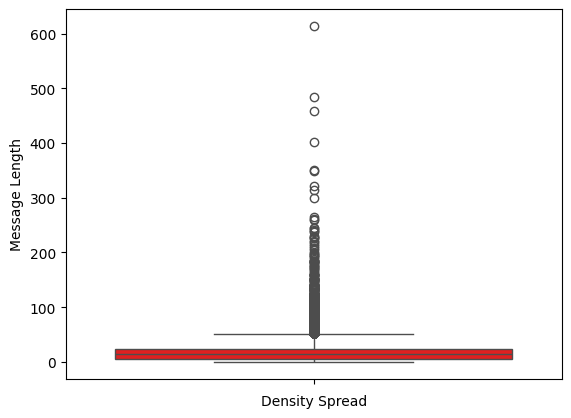

In [ ]:
sns.boxplot(df["Message_length"],color='r')
plt.ylabel("Message Length")
plt.xlabel("Density Spread")
print("This means that, most of the messages have a character length of 0-250approx.\nWe have a >600 character message which is an extreme outlier")

iv) Analysis on the time of messages

In [ ]:
time_series=pd.to_datetime(df["Time"], format="%I:%M:%S %p")
time_values=time_series.dt.time
df["Time"]=pd.Series(time_values)
df

,Date,Time,Sender,Message,Message_length
0,17/06/23,11:22:57,Aiyooo,‎Messages and calls are end-to-end encrypted....,122
1,17/06/23,11:22:57,Ajay Na Koil,‎Ajay Na Koil created group “Aiyooo”,37
2,17/06/23,11:22:57,Aiyooo,‎Ajay Na Koil added you,24
3,17/06/23,11:23:43,Ajay Na Koil,Going to parrys for buying leaf design tuni f...,62
4,17/06/23,11:24:05,J,Saatutu 11:45 ku varatta na,28
...,...,...,...,...,...
63754,14/06/24,10:11:59,Bullbull Koil,Solren aprm 😂,14
63755,14/06/24,10:17:58,Ajay Na Koil,Na yarayo adichitu um ku ulla odren,36
63756,14/06/24,10:18:01,Ajay Na Koil,Adana 🤣🤣🤣,10
63757,14/06/24,10:18:55,Bullbull Koil,Ila ila adhelam ila,20


//Message length sent on each date

In [ ]:
#usual plot: dates in xticks are getting overlapped
'''def _plot_series(series, series_name, series_index=0):
    from matplotlib import pyplot as plt
    import seaborn as sns
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Date']
    ys = series['Message_length']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Message_length')
plt.title("Message length on each date")

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()'''



'def _plot_series(series, series_name, series_index=0):\n    from matplotlib import pyplot as plt\n    import seaborn as sns\n    palette = list(sns.palettes.mpl_palette(\'Dark2\'))\n    xs = series[\'Date\']\n    ys = series[\'Message_length\']\n\n    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])\n\nfig, ax = plt.subplots(figsize=(10, 5.2), layout=\'constrained\')\ndf_sorted = df.sort_values(\'Date\', ascending=True)\n_plot_series(df_sorted, \'\')\nsns.despine(fig=fig, ax=ax)\nplt.xlabel(\'Date\')\n_ = plt.ylabel(\'Message_length\')\nplt.title("Message length on each date")\n\n# Rotate x-axis labels\nplt.xticks(rotation=90)\nplt.tight_layout()\nplt.show()'

In [ ]:
#using interactive plots to examine the dates and message length
import plotly.express as px
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
df_sorted = df


# Identify the dates with max and min Message_length
max_message_length_date = df_sorted.loc[df_sorted['Message_length'].idxmax(), 'Date']
min_message_length_date = df_sorted.loc[df_sorted['Message_length'].idxmin(), 'Date']

# Create the interactive line plot
fig = px.line(df_sorted, x='Date', y='Message_length', title='Message length on each date')
fig.update_layout(xaxis_title='Date', yaxis_title='Message_length')

# Add a vertical red line at the date with maximum Message_length
fig.add_shape(
    go.layout.Shape(
        type="line",
        x0=max_message_length_date,
        x1=max_message_length_date,
        y0=0,
        y1=1,
        xref="x",
        yref="paper",
        line=dict(color="red", width=2, dash="dash"),
        name="Max Message Length"
    )
)

# Add a vertical green line at the date with minimum Message_length
fig.add_shape(
    go.layout.Shape(
        type="line",
        x0=min_message_length_date,
        x1=min_message_length_date,
        y0=0,
        y1=1,
        xref="x",
        yref="paper",
        line=dict(color="green", width=2, dash="dash"),
        name="Min Message Length"
    )
)

# Add annotations for the max and min message lengths
fig.add_annotation(
    x=max_message_length_date,
    y=max_message_length,
    text=f'Max: {max_message_length} on {max_message_length_date}',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor='red',
    bordercolor='black',
    font=dict(color='white')
)

fig.add_annotation(
    x=min_message_length_date,
    y=min_message_length,
    text=f'Min: {min_message_length} on {min_message_length_date}',
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40,
    bgcolor='green',
    bordercolor='black',
    font=dict(color='white')
)

# Make x-axis labels readable
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

//making 'Ajay Na koil' as admin

In [ ]:
df['Designation']='Member'
df.loc[df['Sender']=='Ajay Na Koil',"Designation"]='Admin'
df

,Date,Time,Sender,Message,Message_length,Designation
0,17/06/23,11:22:57,Aiyooo,‎Messages and calls are end-to-end encrypted....,122,Member
1,17/06/23,11:22:57,Ajay Na Koil,‎Ajay Na Koil created group “Aiyooo”,37,Admin
2,17/06/23,11:22:57,Aiyooo,‎Ajay Na Koil added you,24,Member
3,17/06/23,11:23:43,Ajay Na Koil,Going to parrys for buying leaf design tuni f...,62,Admin
4,17/06/23,11:24:05,J,Saatutu 11:45 ku varatta na,28,Member
...,...,...,...,...,...,...
63754,14/06/24,10:11:59,Bullbull Koil,Solren aprm 😂,14,Member
63755,14/06/24,10:17:58,Ajay Na Koil,Na yarayo adichitu um ku ulla odren,36,Admin
63756,14/06/24,10:18:01,Ajay Na Koil,Adana 🤣🤣🤣,10,Admin
63757,14/06/24,10:18:55,Bullbull Koil,Ila ila adhelam ila,20,Member


//What all analysis you can do

- to find which range of time we are most active at.
- to find which month received the most no of messages and which month didnt.
- most discussed keyword in the chat (if you do this, then vera level)